# Linear Regression Model on House price prediction dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('USA_Housing-Copy1.csv')

In [3]:
df.head(5000)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

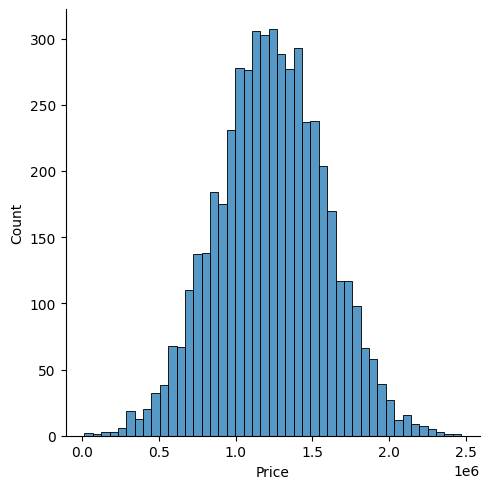

In [7]:
sns.displot(df['Price'])

In [8]:
df.drop('Address',axis=1).corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [9]:
df.head(1000)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
995,87853.848301,6.524727,7.571808,6.43,42302.260998,1.898669e+06,"22912 Taylor Island\nBrianside, MA 36738-0637"
996,66392.570986,5.380619,8.023288,5.13,26623.184161,1.255576e+06,"614 Leah Row Suite 729\nMarissastad, NM 00794"
997,58204.223086,6.301814,7.375616,5.41,46663.402745,1.367641e+06,97004 Gutierrez Greens Apt. 332\nEast Denisevi...
998,88244.614867,6.548375,8.765481,3.36,25791.994985,1.788285e+06,"61508 Taylor Turnpike Suite 751\nNorth Sherry,..."


<Axes: >

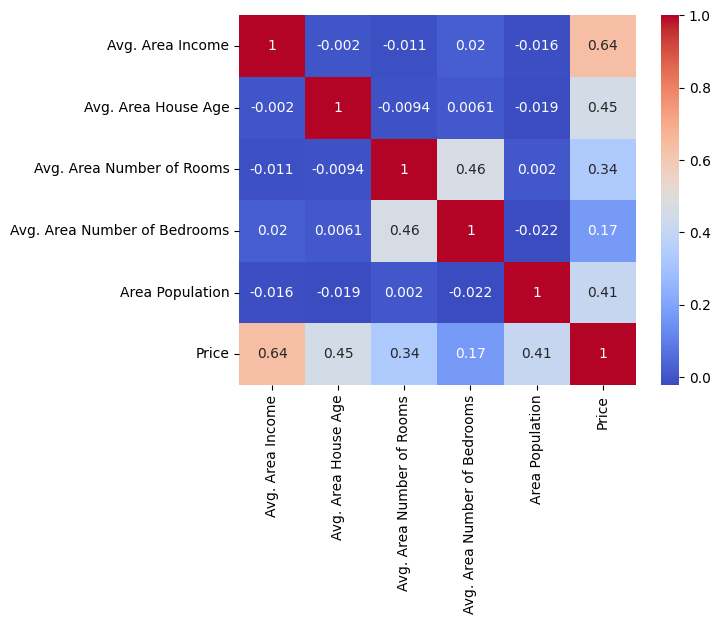

In [10]:
sns.heatmap(df.drop('Address',axis=1).corr(),annot=True,cmap='coolwarm')

In [11]:
df.drop('Address',axis=1,inplace=True)

In [12]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
# Columns that we'll train our data on

In [13]:
Y=df['Price']
# We'll predict this column

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
# test_size is the percentage of total data to be used, random state is the number of times data is split

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(X_train,Y_train)

LinearRegression()

In [19]:
print(lm.intercept_)

-2640441.399781044


In [20]:
lm.coef_

array([2.15666957e+01, 1.65453042e+05, 1.20499839e+05, 1.99978534e+03,
       1.53406038e+01])

In [21]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [22]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [23]:
cdf

,Coeff
Avg. Area Income,21.566696
Avg. Area House Age,165453.042478
Avg. Area Number of Rooms,120499.839093
Avg. Area Number of Bedrooms,1999.785336
Area Population,15.340604


#### The above data means that for 1 unit increase in Avg.Area Income, the price will increase by 21.8(while other constants are fixed)

In [24]:
bias = pd.DataFrame(lm.intercept_,X.columns, columns=['Bias'])

In [25]:
bias

,Bias
Avg. Area Income,-2.640441e+06
Avg. Area House Age,-2.640441e+06
Avg. Area Number of Rooms,-2.640441e+06
Avg. Area Number of Bedrooms,-2.640441e+06
Area Population,-2.640441e+06


# Time taken in making predictions

In [70]:
import time

start_time = time.time()

predictions=lm.predict(X_test) #X_test are the input data that we'll check after training the model
# this will ouptut the predicitons according to our data

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Prediction time: {elapsed_time:.4f} seconds")
print(f"Number of test samples: {len(X_test)}")
print(f"Time per sample: {elapsed_time / len(X_test):.6f} seconds")

Prediction time: 0.0010 seconds
Number of test samples: 1000
Time per sample: 0.000001 seconds


In [72]:
#Taking the avg of first ten observations
# 1)0.002
# 2)0.0010
# 3)0.0010
# 4)0.002
# 5)0.001
# 6)0.002
# 7)0.001
# 8)0.002
# 9)0.001
# 10)0.001
# mean = 0.0014

In [58]:
Y_test #These are the correct predictions of X_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
3900    1.466412e+06
3753    1.222412e+06
3582    1.404622e+06
2392    9.100996e+05
3343    1.188197e+06
Name: Price, Length: 1000, dtype: float64

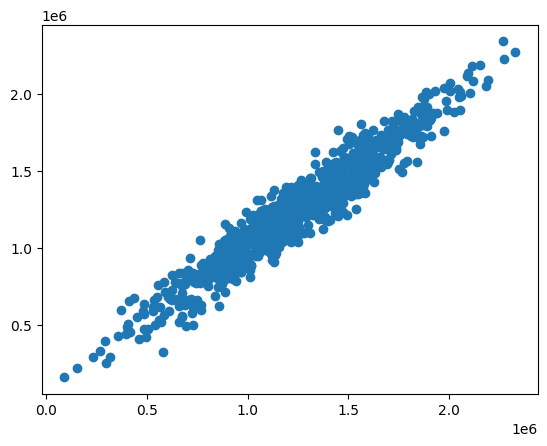

In [28]:
plt.scatter(Y_test,predictions)
# A scatter plot comparing our model's predictions vs correct predictions
# A straight line is a better result because it means that we have a hihg accuracy

<Axes: xlabel='Price', ylabel='Count'>

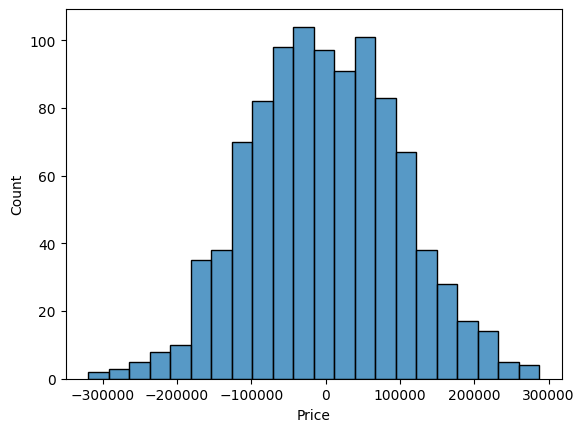

In [29]:
sns.histplot((Y_test-predictions))

In [30]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [31]:
print(mean_absolute_percentage_error(Y_test, predictions))

0.07444178136889712


In [32]:
metrics.mean_absolute_error(Y_test,predictions)

81305.23300085265

In [33]:
metrics.mean_squared_error(Y_test,predictions)

10100187858.863258

In [34]:
np.sqrt(metrics.mean_squared_error(Y_test,predictions)) #RMS value of error
# Most accurate

100499.69083964019

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print("R² Score:", r2)

R² Score: 0.9211719165402357


# Weights & Intercept

In [36]:
# Coefficients from your trained model
weights = {
    "Avg. Area Income": 21.566696,
    "Avg. Area House Age": 165453.042478,
    "Avg. Area Number of Rooms": 120499.839093,
    "Avg. Area Number of Bedrooms": 1999.785336,
    "Area Population": 15.340604,
}

# If your model included an intercept (bias term), set it here
bias = -2616071.0   # Replace with actual intercept if available

# Predicting on test cases

In [37]:
#test_case1
#random row dataset taken for comparison between predicted price and actual price
input_features = {
    "Avg. Area Income": 79545.458574317,
    "Avg. Area House Age": 5.6828613216156,
    "Avg. Area Number of Rooms": 7.0091881427922,
    "Avg. Area Number of Bedrooms": 4.09,
    "Area Population": 23086.800502686,
}

In [38]:
# Compute y = sum(w_i * x_i) + b
predicted_price = sum(weights[feature] * input_features[feature] for feature in weights) + bias
print(f"Predicted House Price: {predicted_price:.2f}")

actual_price_1= 1059033.5578701
error_1=  np.abs((actual_price_1-predicted_price)/predicted_price)*100
error_1

Predicted House Price: 1246659.05


15.05026501046035

In [39]:
accuracy_1= 100-error_1
accuracy_1

84.94973498953965

In [40]:
#test_case2
#random row dataset taken for comparison between predicted price and actual price
input_features = {
    "Avg. Area Income": 79248.642454826,
    "Avg. Area House Age": 6.0028998082752,
    "Avg. Area Number of Rooms": 6.7308210190949,
    "Avg. Area Number of Bedrooms": 3.09,
    "Area Population": 40173.072173645,
}

In [41]:
# Compute y = sum(w_i * x_i) + b
predicted_price = sum(weights[feature] * input_features[feature] for feature in weights) + bias
print(f"Predicted House Price: {predicted_price:.2f}")

actual_price_2= 1505890.9148469
error_2=  np.abs((actual_price_2-predicted_price)/predicted_price)*100
error_2

Predicted House Price: 1519779.80


0.9138745319309585

In [42]:
accuracy_2= 100-error_2
accuracy_2

99.08612546806904

In [43]:
#test_case3
#random row dataset taken for comparison between predicted price and actual price
input_features = {
    "Avg. Area Income": 61287.067178657,
    "Avg. Area House Age": 5.86588984031,
    "Avg. Area Number of Rooms": 8.5127274303751,
    "Avg. Area Number of Bedrooms": 5.13,
    "Area Population": 36882.159399705,
}

In [44]:
# Compute y = sum(w_i * x_i) + b
predicted_price = sum(weights[feature] * input_features[feature] for feature in weights) + bias
print(f"Predicted House Price: {predicted_price:.2f}")

actual_price_3= 1058987.9878761
error_3=  np.abs((actual_price_3-predicted_price)/predicted_price)*100
error_3

Predicted House Price: 1278053.65


17.140568812880204

In [45]:
accuracy_3= 100-error_3
accuracy_3

82.8594311871198

In [46]:
#test_case4
#random row dataset taken for comparison between predicted price and actual price
input_features = {
    "Avg. Area Income": 63345.240046228,
    "Avg. Area House Age": 7.1882360945186,
    "Avg. Area Number of Rooms": 5.5867286648277,
    "Avg. Area Number of Bedrooms": 3.26,
    "Area Population": 34310.242830907,
}

In [47]:
# Compute y = sum(w_i * x_i) + b
predicted_price = sum(weights[feature] * input_features[feature] for feature in weights) + bias
print(f"Predicted House Price: {predicted_price:.2f}")

actual_price_4= 1260616.8066294
error_4=  np.abs((actual_price_4-predicted_price)/predicted_price)*100
error_4

Predicted House Price: 1145451.12


10.05417723644928

In [48]:
accuracy_4= 100-error_4
accuracy_4

89.94582276355072

In [49]:
#test_case5
#random row dataset taken for comparison between predicted price and actual price
input_features = {
    "Avg. Area Income": 59748.855486974,
    "Avg. Area House Age": 5.3393398807459,
    "Avg. Area Number of Rooms": 7.7486816056066,
    "Avg. Area Number of Bedrooms": 4.23,
    "Area Population": 27809.986543759,
}

In [50]:
# Compute y = sum(w_i * x_i) + b
predicted_price = sum(weights[feature] * input_features[feature] for feature in weights) + bias
print(f"Predicted House Price: {predicted_price:.2f}")

actual_price_5= 895737.13338351
error_5=  np.abs((actual_price_5-predicted_price)/predicted_price)*100
error_5

Predicted House Price: 924720.40


3.1342735364150736

In [51]:
accuracy_5= 100-error_5
accuracy_5

96.86572646358492